In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [16]:
def initialize_centroids(pixels, K):
    """Randomly pick K pixels as initial centroids"""
    np.random.seed(0)
    indices = np.random.choice(len(pixels), K, replace=False)
    return pixels[indices]

def assign_clusters(pixels, centroids):
    """Assign each pixel to the nearest centroid"""
    distances = np.sqrt(((pixels - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(pixels, labels, K):
    """Update centroids as the mean of assigned pixels"""
    new_centroids = []
    for k in range(K):
        cluster_points = pixels[labels == k]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # reinitialize if a cluster gets no points
            new_centroids.append(pixels[np.random.choice(len(pixels))])
    return np.array(new_centroids)

def kmeans(pixels, K, max_iters=20):
    """Run K-Means algorithm"""
    centroids = initialize_centroids(pixels, K)
    for _ in range(max_iters):
        labels = assign_clusters(pixels, centroids)
        new_centroids = update_centroids(pixels, labels, K)
        if np.allclose(centroids, new_centroids):  # convergence check
            break
        centroids = new_centroids
    return labels, centroids

In [17]:
def compress_image(image_path, K=16): 
    # 1. Load image 
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    rows, cols, ch = image_np.shape
    pixels = image_np.reshape(-1, ch)
 
    # 2. Run K-Means 
    print(f"Compressing image to {K} colors (no sklearn)...")
    labels, centroids = kmeans(pixels, K)
 
    # 3. Replace pixel colors
    compressed_pixels = centroids[labels].astype("uint8")
    compressed_image = compressed_pixels.reshape(rows, cols, ch)
 
    # 4. Show results 
    plt.figure(figsize=(6, 6))
    plt.imshow(compressed_image)
    plt.title(f"Compressed Image with {K} colors")
    plt.axis("off")
    plt.show()
 
    # 5. Save image 
    compressed_path = "compressed_image_python.jpg"
    Image.fromarray(compressed_image).save(compressed_path)
 
    # 6. Compare file sizes 
    original_size = os.path.getsize(image_path) / 1024
    compressed_size = os.path.getsize(compressed_path) / 1024
    print(f"Original: {original_size:.2f} KB, Compressed: {compressed_size:.2f} KB")
    print(f"Compression ratio: {original_size/compressed_size:.2f}x")

Compressing image to 20 colors (no sklearn)...


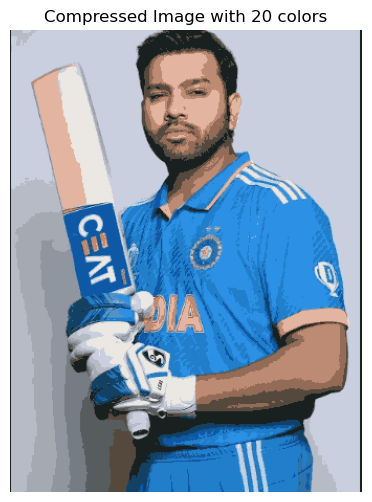

Original: 203.89 KB, Compressed: 24.87 KB
Compression ratio: 8.20x


In [19]:
# run
if __name__ == "__main__":
    image_path = "image.jpg" 
    K = 20
    compress_image(image_path, K)